## Stroke Prediction Dataset Case Study

### Step 1:<span style="color:purple"> Import Libraries </span>

In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [377]:
import warnings
warnings.filterwarnings("ignore")

### Step 2: <span style="color:purple"> Import Dataset </span> 

In [382]:
strokedata = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(strokedata.info())
print(strokedata.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

### Step 3: <span style="color:purple">Data Cleansing </span>

In [383]:
# we will drop the id column as its unneccessary 
strokedata.drop("id", axis=1, inplace=True)

In [384]:
strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [385]:
#finding null values
strokedata.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [386]:
#we will replace null values in BMI to the mean in the BMI column
strokedata.bmi.fillna(value=strokedata.bmi.mean(), inplace=True)

#double checking to make sure all null values were replaced
strokedata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Step 3: <span style="color:purple"> Analyze Data </span> 

**Gender Variables** 

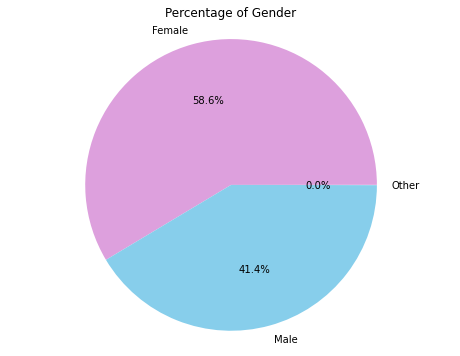

In [159]:
#Percentage of data represented by gender
#We'll create a pie chart to visualize percentages
labels = strokedata.gender.value_counts().index
sizes = strokedata.gender.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum", "skyblue","white"))
plt.axis("equal") #Equal aspect ratio ensures pie is drawn in circle
plt.title("Percentage of Gender")
plt.show()

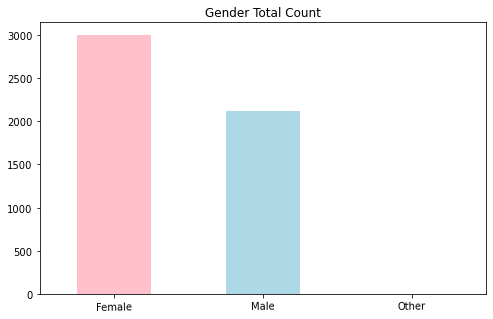

In [124]:
#Total sum of Genders show that Females are more present in this dataset than Males
totalgender= strokedata.gender.value_counts()
totalgender.plot(kind="bar", title = "Gender Total Count", color = ("pink", "lightblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Hypertension Variables**

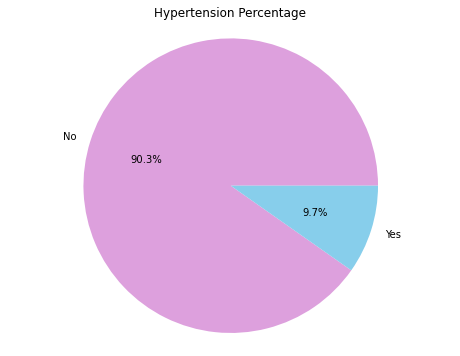

In [158]:
#Percentage og patients that had hypertension
#We'll create a pie chart to better visualize
labels= ("No","Yes")
sizes= strokedata.hypertension.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum", "skyblue"))
plt.axis("equal") #Equal aspect ratio ensures that pie is drawn in circle
plt.title("Hypertension Percentage")
plt.show()

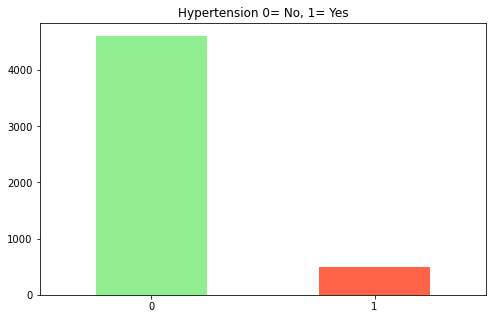

In [123]:
#Creating a bar graph of hypertension variable
totalhypertension = strokedata.hypertension.value_counts()
totalhypertension.plot(kind="bar", title="Hypertension 0= No, 1= Yes", color=("lightgreen", "tomato"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Heart Disease Variables**

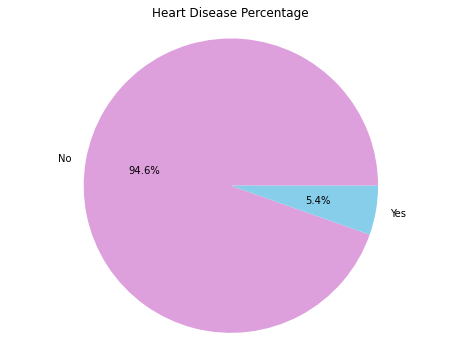

In [161]:
#Percentage of patients that have heart disease in dataset
#We'll create a pie chart to visualize percentages
labels= ("No", "Yes")
sizes= strokedata.heart_disease.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum","skyblue"))
plt.axis("equal") #Equal aspect ratio ensures that pie is drawn in circle
plt.title("Heart Disease Percentage")
plt.show()

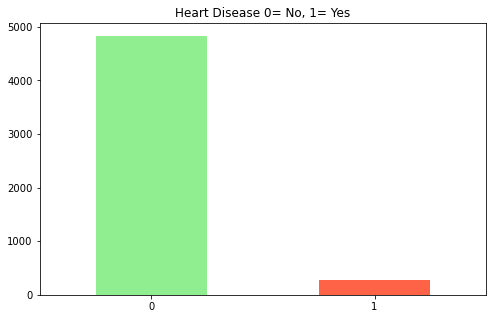

In [122]:
#Creating a bar graph of Heart Disease variable
totalheartdisease = strokedata.heart_disease.value_counts()
totalheartdisease.plot(kind="bar", title="Heart Disease 0= No, 1= Yes", color=("lightgreen", "tomato"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Stroke Variable**

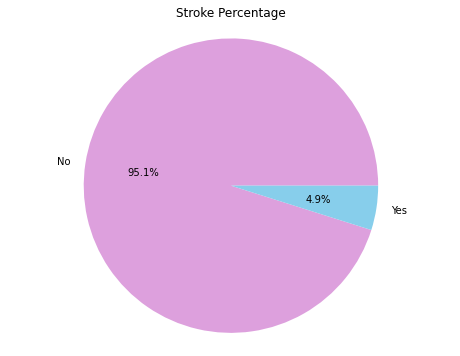

In [168]:
#Percentage of patients who had a stroke in dataset
#We'll create a pie chart to visualize percentages
labels= ("No", "Yes")
sizes= strokedata.stroke.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum", "skyblue"))
plt.axis("equal") #Equal aspect ratio ensures that pie is drawn in circle
plt.title("Stroke Percentage")
plt.show()

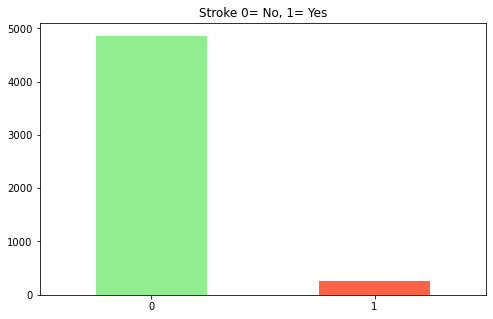

In [121]:
#Creating a bar graph of the stroke variable
totalstroke = strokedata.stroke.value_counts()
totalstroke.plot(kind="bar", title="Stroke 0= No, 1= Yes", color=("lightgreen", "tomato"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Smoking Status Variable**

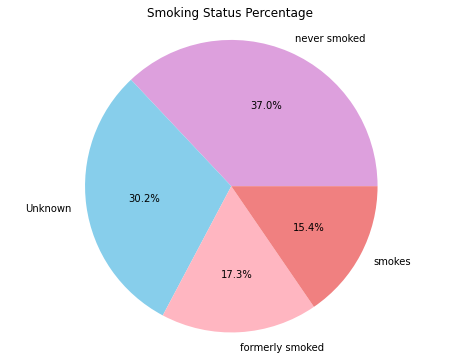

In [169]:
#Percentage of patients smoking status in dataset
strokedata.smoking_status.value_counts(normalize=True)
#We'll create a pie chart to visualize the percentages
labels = strokedata.smoking_status.value_counts().index
sizes = strokedata.smoking_status.value_counts().values
colors= ("plum", "skyblue", "lightpink", "lightcoral")

plt.figure(figsize=(8,6))
plt.pie(sizes,labels=labels, autopct="%1.1f%%", colors=colors)
plt.axis("equal")#Equal aspect ratio ensures that pie is drawn in circle
plt.title("Smoking Status Percentage")
plt.show()

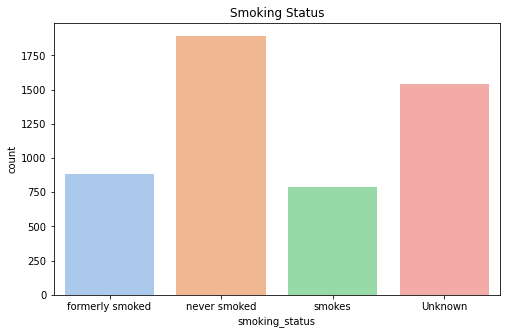

In [116]:
#Creating a bar graph of the smoking status variable
plt.figure(figsize=(8,5))
sns.countplot(x="smoking_status", data=strokedata, palette="pastel")
plt.title("Smoking Status")
plt.show()

**Marriage Variable**

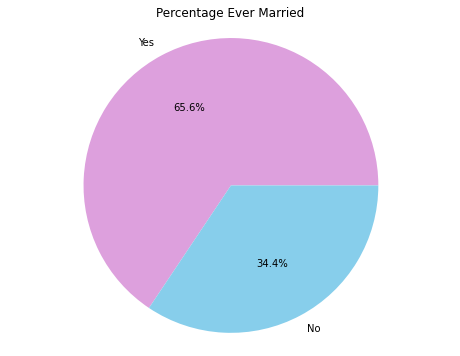

In [175]:
#Percentage of patients ever married
#We'll create a pie chart to visualize percentages
labels = strokedata.ever_married.value_counts().index
sizes= strokedata.ever_married.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum","skyblue"))
plt.axis("equal") #Equal aspect ratio ensures pie is drawn in circle
plt.title("Percentage Ever Married")
plt.show()

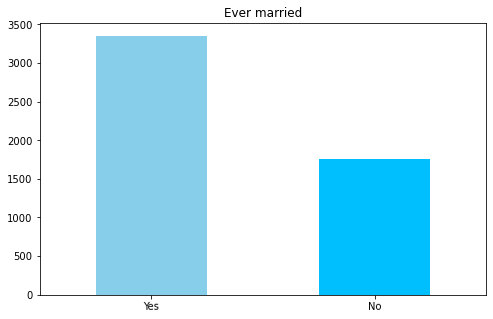

In [97]:
#Creating a bar graph of the Ever married variable
totalmarried = strokedata.ever_married.value_counts()
totalmarried.plot(kind="bar", title="Ever married", color=("skyblue", "deepskyblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Work Type Variable**

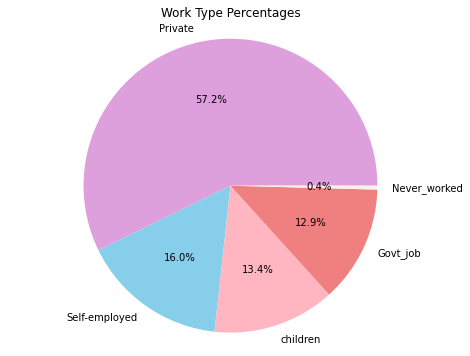

In [172]:
#Percentage of different work types
#We'll create a pie chart to visualize the percentages
labels = strokedata.work_type.value_counts().index
sizes = strokedata.work_type.value_counts().values
colors = ("plum", "skyblue", "lightpink", "lightcoral", "linen")

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)
plt.axis("equal") #Equal aspect ratio ensures that pie is drawn in circle
plt.title("Work Type Percentages")
plt.show()

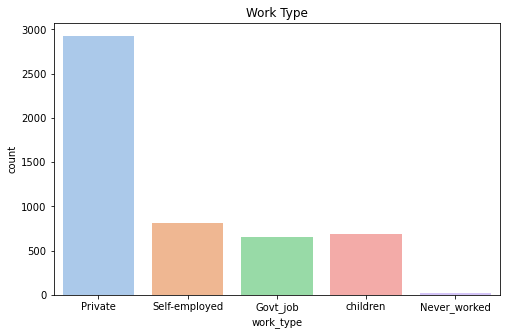

In [126]:
#Creating a bar graph of different work types in dataset
plt.figure(figsize=(8,5))
sns.countplot(x="work_type", data=strokedata, palette="pastel")
plt.title("Work Type")
plt.show()

**Residence Variable**

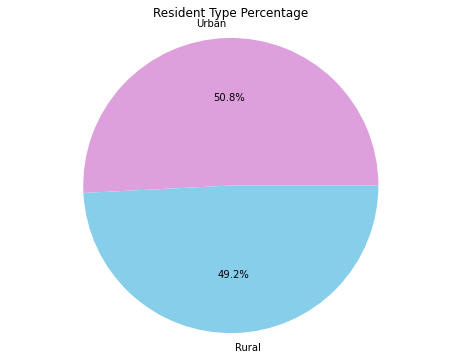

In [174]:
#Percentage of residence type
#We'll create a pie chart to visualize percentages
labels = strokedata.Residence_type.value_counts().index
sizes = strokedata.Residence_type.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum", "skyblue"))
plt.axis("equal") #Equal aspect ratio ensures that pie is drawn in circle
plt.title("Resident Type Percentage")
plt.show()

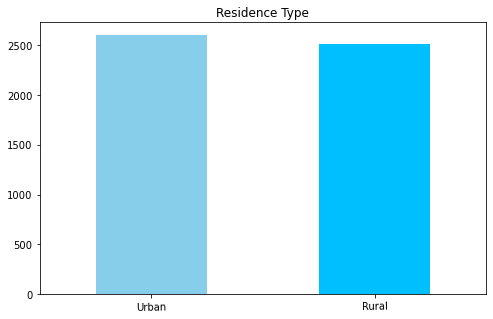

In [130]:
#Creating a bar graph of residence type in dataset
totalresidence= strokedata.Residence_type.value_counts()
totalresidence.plot(kind="bar", title="Residence Type", color=("skyblue", "deepskyblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

**Distribution of Age**

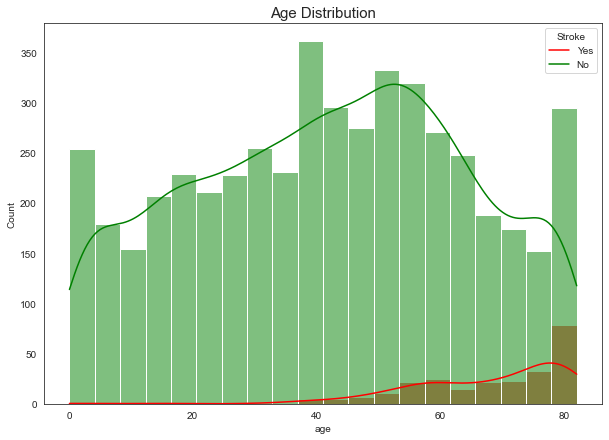

In [265]:
#We'll create a histogram of the distribution of ages in this dataset
plt.figure(figsize=(10,7))
hue_colors={0:"g", 1:"r"} #let's see the count of stroke patients in age groups
sns.histplot( data= strokedata, x = "age", kde=True, hue="stroke", palette=hue_colors)
plt.legend(labels=["Yes","No"], title="Stroke")
plt.title("Age Distribution", fontsize=15)
plt.show()

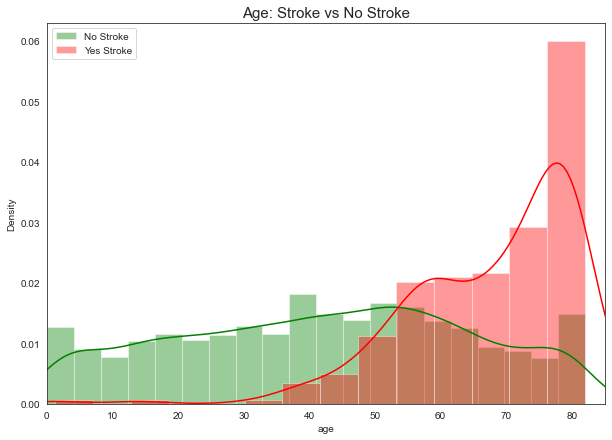

In [258]:
#We'll create now a distplot to see the density of people at different age groups who suffered a stroke
plt.figure(figsize=(10,7))
#Setting some conditions for the graph to see stroke vs non stroke
yesstroke= strokedata[strokedata["stroke"]==1]["age"]
nostroke= strokedata[strokedata["stroke"]==0]["age"]
sns.set_style("white") #making the background white

sns.distplot(nostroke, color="green", label="No Stroke")  
sns.distplot(yesstroke, color="red", label="Yes Stroke")
plt.xlim(0,85) #Setting an x range limit
plt.title("Age: Stroke vs No Stroke", fontsize=15)
plt.legend()
plt.show()

**Using this graph we can see through density that patients of age 50 and up had a higher chance of suffering from a stroke**

**Average Glucose Level Distribution**

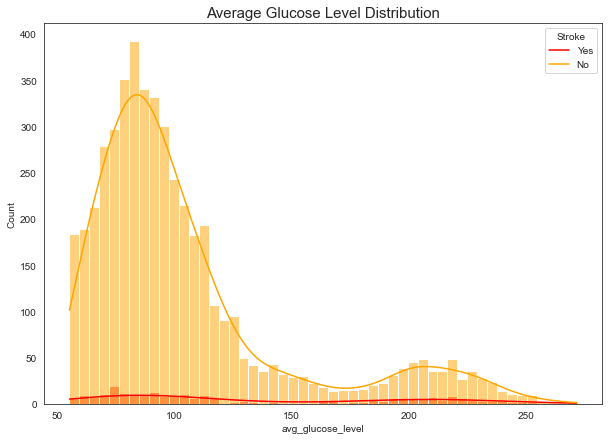

In [260]:
#We'll create a histogram of the distribution of the average glucose level in this dataset
plt.figure(figsize=(10,7))
hue_colors={0:"orange", 1:"r"} #We'll see the count of stroke patients in avg glucose level distributions
sns.histplot(data=strokedata, x="avg_glucose_level", kde=True, hue="stroke", palette=hue_colors)
plt.legend(labels=["Yes","No"], title="Stroke")
plt.title("Average Glucose Level Distribution", fontsize=15)
plt.show()

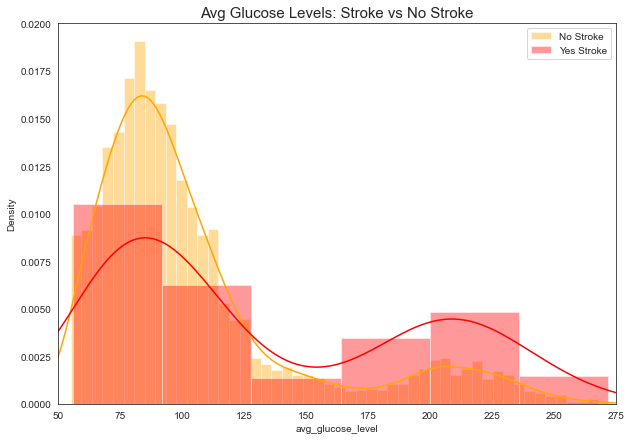

In [257]:
#We'll now create a distplot to see the density of people with stroke in the average glucose levels
plt.figure(figsize=(10,7))
#Setting some conditions for stroke(red) and no stroke (orange)
yesstroke= strokedata[strokedata["stroke"]==1]["avg_glucose_level"]
nostroke= strokedata[strokedata["stroke"]==0]["avg_glucose_level"]

#Creating distplot with labels, title, legend and setting an x range limit
sns.distplot(nostroke, color="orange", label="No Stroke")
sns.distplot(yesstroke, color="red", label="Yes Stroke")
plt.xlim(50,275)
plt.legend()
plt.title("Avg Glucose Levels: Stroke vs No Stroke", fontsize=15)
plt.show()

**Using this graph we can see that interestingly that those who had avg glucose levels of less than 100 are more likely to have had a stroke though overall its not a total pinpoint of determining the possibility of having a stroke as those who had average levels between 175-225 are more likely to have had a stroke than those with average levels of 150 and 250.**

**Bmi Distribution**

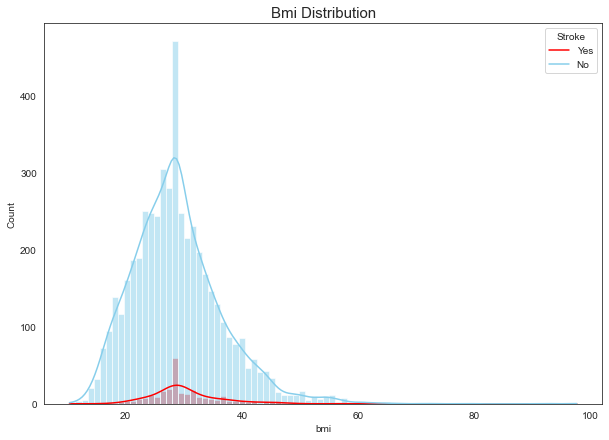

In [261]:
#We'll create a histogram of the distribution of Bmi
plt.figure(figsize=(10,7))
hue_colors={0:"skyblue", 1:"red"} #we'll see the count of stroke patients in bmi distributions
sns.histplot(data=strokedata, x="bmi", kde=True, hue="stroke", palette=hue_colors)
plt.legend(labels=["Yes","No"], title="Stroke")
plt.title("Bmi Distribution", fontsize=15)
plt.show()

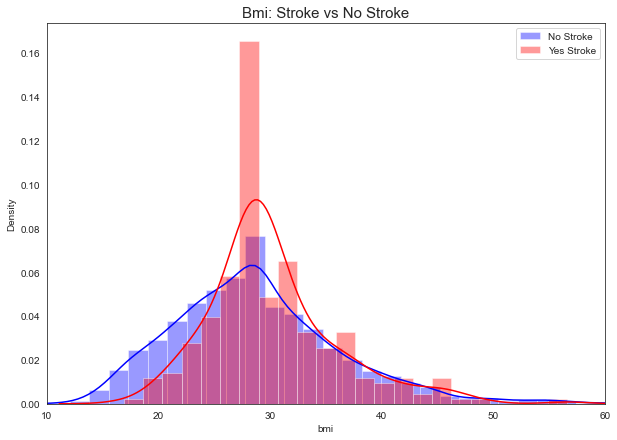

In [264]:
#We'll create a distplot to see the density of people who had stroke with the bmi levels
plt.figure(figsize=(10,7))
#Setting some conditions for stroke and no stroke in relation to bmi
yesstroke= strokedata[strokedata["stroke"]==1]["bmi"]
nostroke= strokedata[strokedata["stroke"]==0]["bmi"]

#Creating a distplot with labels, title, legend, and setting an x range limit.
sns.distplot(nostroke, color="blue", label="No Stroke")
sns.distplot(yesstroke, color="red", label="Yes Stroke")
plt.xlim(10,60)
plt.legend()
plt.title("Bmi: Stroke vs No Stroke",fontsize=15)
plt.show()

**The graph shows us through density that patients with bmi's close to 30 suffered from stroke more.**

**Heat Map**

In [38]:
#Creating a heatmap to find correlations
strokedata.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


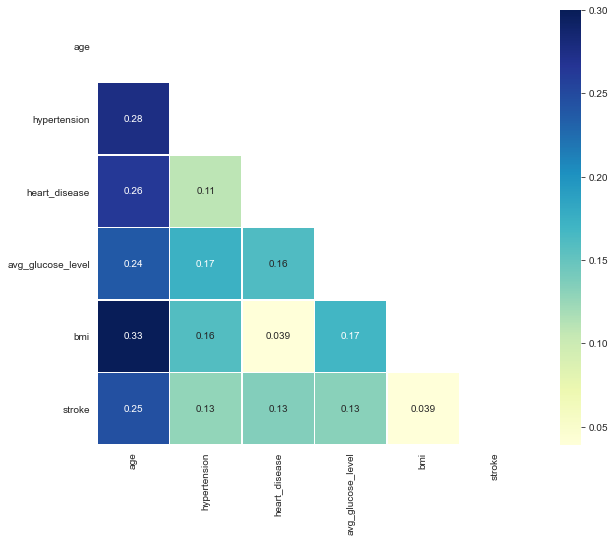

In [387]:
corr= strokedata.corr()  #correlation matrix
mask= np.zeros_like(corr) #Generating a mask for upper dataset
mask[np.triu_indices_from(mask)]= True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10,8)) #Setting up matplotlib figure
    #heatmap created with personalized color and size
    ax = sns.heatmap(corr, mask=mask,annot=True, cmap= "YlGnBu", linewidths = .6, vmax=.3,square=True) 

With conditional formating its very easy to see if there are any correlating factors between **stroke** and the other units. However overall we don't see any strong correlations **(being closer to 1.0)** between a stroke and the other units.

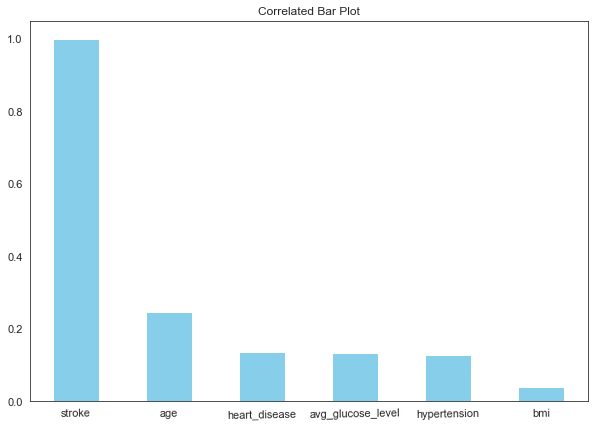

In [388]:
#We'll create a bar plot showing the correlation against STROKE in descending order
plt.figure(figsize=(10,7))
correlated_dataframe= strokedata.corr()
correlated_dataframe["stroke"].sort_values(ascending=False).plot(kind="bar", title="Correlated Bar Plot", fontsize=11, color="skyblue")
plt.xticks(rotation=1) #rotating x marker names for easier reading
plt.show()

**Catplots**

In [353]:
#Using a catplot for variables that were Yes/No like gender, hypertension, heart disease, smoking status etc.
#First we'll find the average of people who had a stroke and group them based on gender.
strokedata[["gender","stroke"]].groupby("gender").mean().sort_values("stroke", ascending=False)


,stroke
gender,
Male,0.051064
Female,0.047094
Other,0.000000


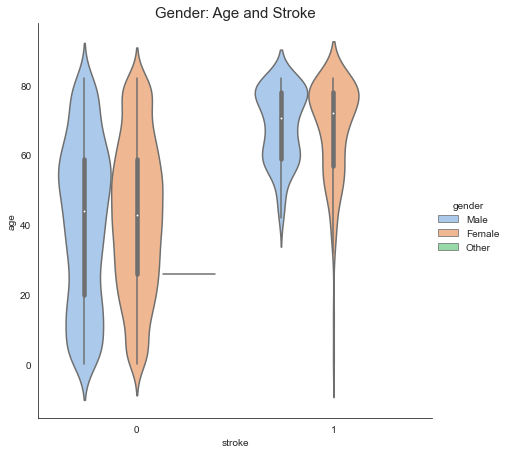

In [358]:
#Now let's create a catplot using age and stroke to see visually the genders who had more strokes.
sns.catplot(data=strokedata, x="stroke", y="age", hue="gender", palette="pastel", kind="violin", height=6)
plt.title("Gender: Age and Stroke", fontsize=15)
plt.show()

**In this dataset men had more strokes than women and interestingly younger women were more likely to suffer a stroke than younger men.**

In [352]:
#Now we'll find the average of people who had hypertension and suffered a stroke
strokedata[["hypertension", "stroke"]].groupby("hypertension").mean().sort_values("stroke", ascending=False)
#where 0 means they had hypertension and 1 means they didn't have hypertension

,stroke
hypertension,
1,0.132530
0,0.039679


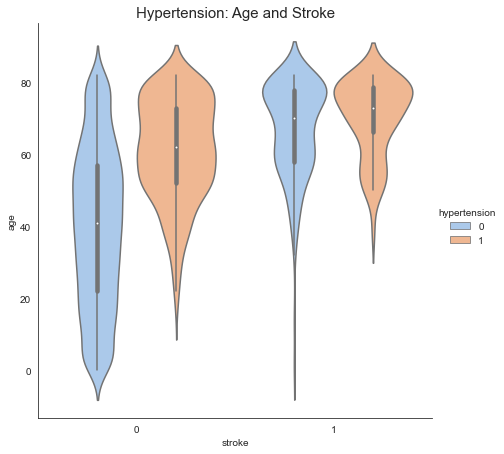

In [357]:
#Now we'll see visually using a catplot the age of patients who had hypertension and suffered a stroke.
sns.catplot(data=strokedata, x="stroke", y="age", hue="hypertension", palette="pastel", kind="violin", height=6)
plt.title("Hypertension: Age and Stroke", fontsize=15)
plt.show()

**In this dataset we see that those of older age who had hypertension were more likely to get a stroke than those who had hypertension but were of younger age.**

In [405]:
#Now we'll find the average of people who had heart disease and suffered a stroke
strokedata[["heart_disease", "stroke"]].groupby("heart_disease").mean().sort_values("stroke", ascending=False)
#Where 0 means they don't have heart disease and 1 means they do have heart disease

,stroke
heart_disease,
1,0.170290
0,0.041787


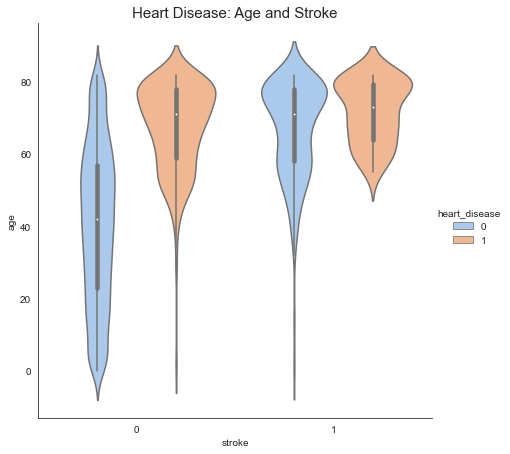

In [389]:
#Now we'll see visually using a catplot the age of patients who had heart disease and suffered a stroke.
sns.catplot(data=strokedata, x="stroke", y="age", hue="heart_disease", palette="pastel", height=6, kind="violin")
plt.title("Heart Disease: Age and Stroke", fontsize=15)
plt.show()

**In this dataset we see that those of older age who had heart disease were more likely to suffer a stroke than those of younger age who had heart disease.**

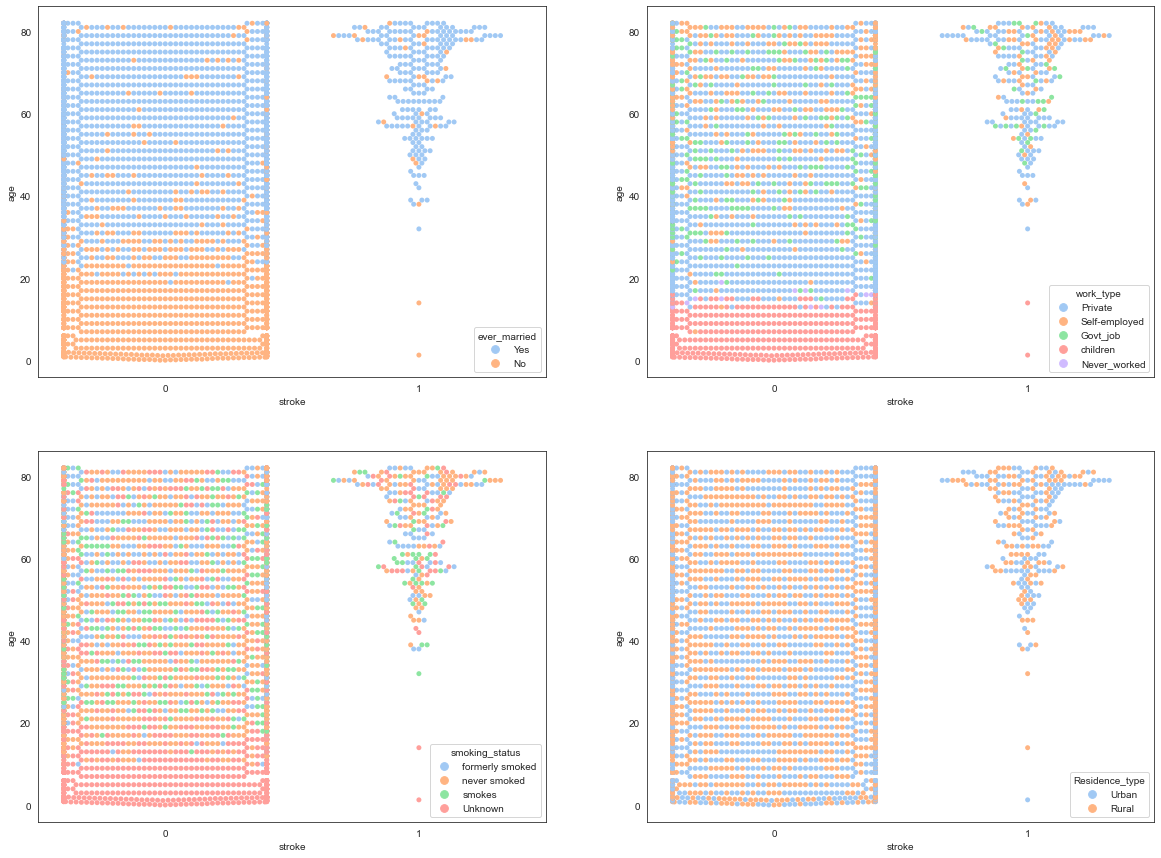

In [399]:
#Now we'll create subplots for the other variables ever married, work type, smoking status and residential type.
fig, ax= plt.subplots(2,2, figsize=(20,15))
sns.swarmplot(data=strokedata, x="stroke", y="age", hue="ever_married", palette="pastel", ax=ax[0,0])
sns.swarmplot(data=strokedata, x="stroke", y="age", hue="work_type", palette="pastel", ax=ax[0,1])
sns.swarmplot(data=strokedata, x="stroke", y="age", hue="smoking_status", palette="pastel", ax=ax[1,0])
sns.swarmplot(data=strokedata, x="stroke", y="age", hue="Residence_type", palette="pastel", ax=ax[1,1])
plt.show()

In [404]:
#We can further look into the averages of each variable when a stroke occured.
#To find the average of if ever married and stroke
strokedata[["ever_married", "stroke"]].groupby("ever_married").mean().sort_values("stroke", ascending=False)

,stroke
ever_married,
Yes,0.065613
No,0.016505


In [403]:
#The average of work type and stroke
strokedata[["work_type", "stroke"]].groupby("work_type").mean().sort_values("stroke", ascending=False)

,stroke
work_type,
Self-employed,0.079365
Private,0.050940
Govt_job,0.050228
children,0.002911
Never_worked,0.000000


In [406]:
#The average of smoking status and stroke
strokedata[["smoking_status", "stroke"]].groupby("smoking_status").mean().sort_values("stroke", ascending=False)

,stroke
smoking_status,
formerly smoked,0.079096
smokes,0.053232
never smoked,0.047569
Unknown,0.030440


In [407]:
#The average of residence type and stroke
strokedata[["Residence_type","stroke"]].groupby("Residence_type").mean().sort_values("stroke", ascending=False)

,stroke
Residence_type,
Urban,0.052003
Rural,0.045346


### Using OLS Regression - Creating a Multivariate Regression Model 

In [412]:
#Stroke dataframe
columns1 =["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

independentvariables= strokedata[columns1]
dependentvariable= strokedata["stroke"]

independentvariables= sm.add_constant(independentvariables)

regression_model= sm.OLS(dependentvariable, independentvariables).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     83.32
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.24e-84
Time:                        16:41:21   Log-Likelihood:                 797.26
No. Observations:                5110   AIC:                            -1583.
Df Residuals:                    5104   BIC:                            -1543.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0379      0.01

**The R-squared also known as the Coefficent of Determination, is an indicator of goodness of fit and shows how many points fall on the regression line. For the stroke dataframe we have 0.075 = 7% meaning 7% of values will fit the regression model. This shows its not an ideal model in terms of "fit".**

<AxesSubplot:title={'center':'Regression Coefficients for Stroke'}>

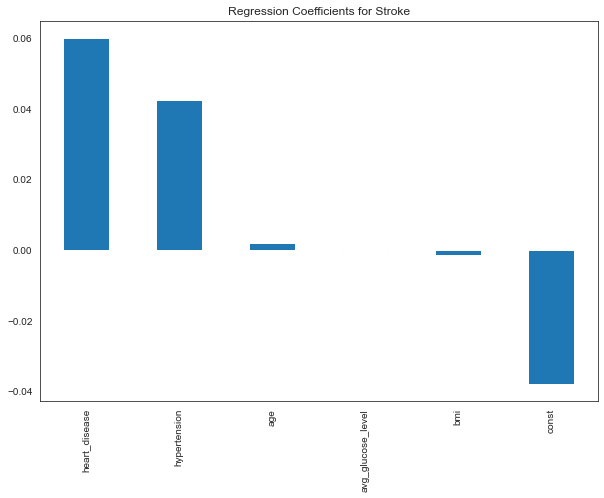

In [415]:
#Now we'll do an analysis of the coefficents to extract and better understand the variables that display
# the largest rate of change with respect to stroke

plt.figure(figsize=(10,7))
regression_model.params.sort_values(ascending=False).plot(kind="bar", title= "Regression Coefficients for Stroke")
#We are using the params method to extract coefficents from regression model 
#and we created a bar plot to identify the coefficients that react most strongly with respect to stroke.

### Conclusion

**Overall analysis of this dataset shows that while older people tended to have suffer most from a stroke, 
heart disease tends to have a stronger relationship with stroke patients as well as a combination of other features overall being male, self-employed, married, having formally smoked, urban residential living and having both heart disease and hypertension.**
**Those least likely to suffer from a stroke tend to be younger in age, female, not married, rural residential living and not working, as well not suffering from neither heart disease nor stroke.**

### Export CSV

In [416]:
strokedata.to_csv("finalized_strokedata.csv")